Input:

* NxN binary matrix M
* p0 = (i,j)
* p1 = (i,j)

p0, p1 are points inside the matrix
if M[i,j] == 1, then that patch is traversable, otherwise it is not

Output:

* list of points [p0,k1,k2,k3,k4,...,p1] that conects points p0 and p1 and that doesn't contain non-traversable patches

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl

In [8]:
N = 20

# everythin is zero-based
#   |
# i v 
# 
# j -->
M = np.array([[0,0,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,0,0],
              [1,1,1,0,0,0,0,1,1,0,0,0,1,1,1,1,1,1,0,0],
              [1,0,1,1,1,0,0,0,1,0,0,0,1,1,1,1,1,1,0,0],
              [1,0,1,0,1,1,1,0,1,0,0,0,1,1,1,1,1,1,0,0],
              [0,0,1,0,0,0,1,1,1,0,0,0,1,1,1,1,1,1,0,0],
              [0,1,1,0,0,0,1,0,1,0,0,0,1,1,1,1,1,1,0,0],
              [0,0,1,0,0,0,1,0,1,0,0,0,1,1,1,1,1,1,0,0],
              [0,0,1,1,1,0,1,0,1,0,0,0,1,1,1,1,1,1,0,0],
              [0,0,1,0,0,0,1,1,1,0,0,0,1,1,1,1,1,1,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0]])

#M = np.ones([N, N])
p0 = (5,1)
p1 = (8,8)

In [9]:
# WLE is (Point, (Point))
todo = [(p0, ())]
visited = set()

def safeadd(todo,wle):
    p = wle[0]
    if p[0] >= 0 and p[0] < N and p[1] >= 0 and p[1] < N:
        if M[p[0],p[1]] == 1:
            todo.append(wle)

while todo:
    p, path = todo.pop()
    if p == p1:
        break
    if p not in visited:
        visited.add(p)
        safeadd(todo, ((p[0]+1,p[1]), (p, *path)))
        safeadd(todo, ((p[0]-1,p[1]), (p, *path)))
        safeadd(todo, ((p[0],p[1]+1), (p, *path)))
        safeadd(todo, ((p[0],p[1]-1), (p, *path)))
        todo.sort(key=lambda p: -math.hypot(p[0][0] - p1[0], p[0][1] - p1[1]))

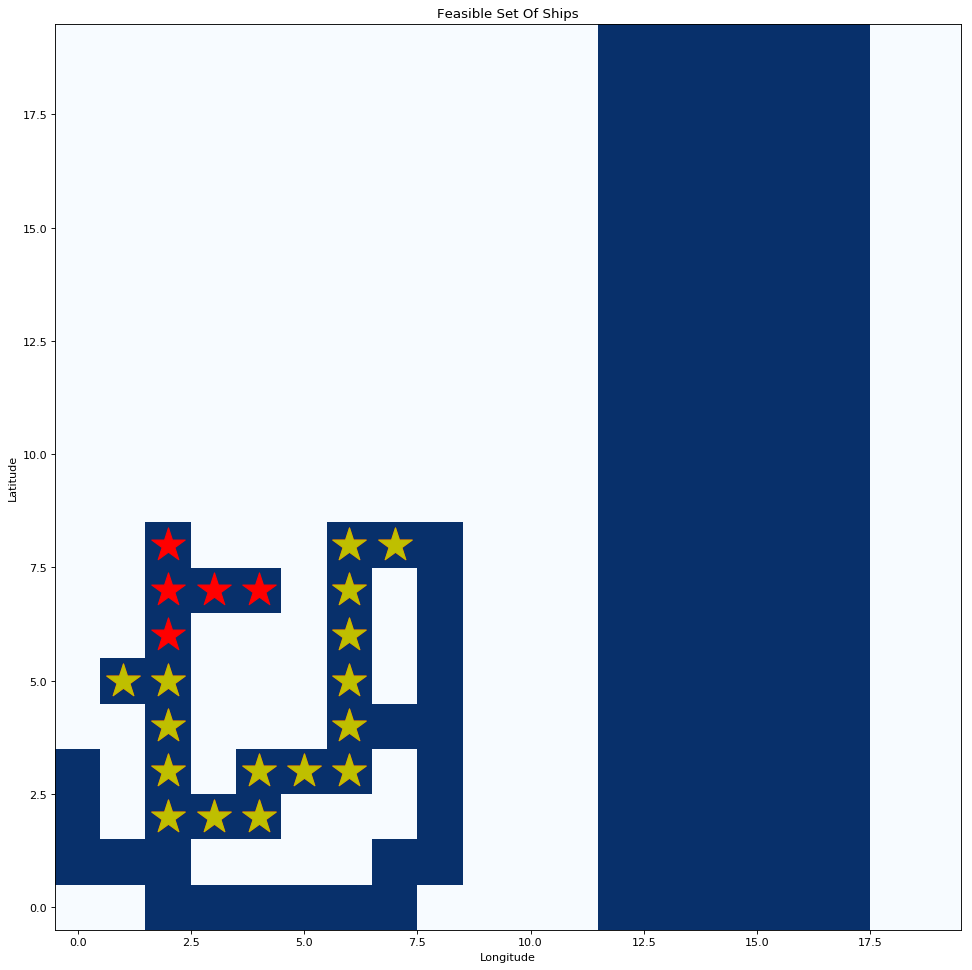

In [10]:
fig = plt.figure(figsize=(15, 15), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, xlabel="Longitude", ylabel="Latitude", title="Feasible Set Of Ships")
plt.imshow(M, interpolation='nearest', origin='low',
           cmap=mpl.cm.Blues)

(x,y) = list(zip(*visited))
plt.scatter(y,x, marker='*', color='r', s=1000)

(x,y) = list(zip(*path))
plt.scatter(y,x, marker='*', color='y', s=1000)